In [1177]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [1178]:
df = pd.read_csv('C:/train.csv', na_values = ['#NAME?']) 

In [1179]:
df.head(40)

,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
0,3682648,15100,71168.0,97480.0,1.0,0.0,9.0,0.0,119.166667,19.0,NaN,0,0,1,2.00950,1
1,3682649,21100,81747.0,109840.0,1.0,0.0,NaN,0.0,174.786162,24.0,40.067527,0,0,1,1.27240,0
2,3682650,15900,94262.0,128414.0,1.0,3.0,4.0,NaN,242.736126,42.0,39.231892,1,0,2,1.47250,0
3,3682651,12900,110899.0,124480.0,1.0,2.0,7.0,0.0,204.900000,40.0,NaN,0,1,2,1.57010,1
4,3682652,24600,NaN,35523.0,0.0,0.0,21.0,0.0,84.111988,15.0,29.865634,0,0,1,1.50130,0
5,3682653,15000,65742.0,86608.0,0.0,0.0,NaN,0.0,289.581891,20.0,28.285563,0,0,0,1.51770,0
6,3682654,22800,75253.0,106166.0,1.0,0.0,NaN,0.0,176.339376,24.0,38.266594,0,0,1,2.43220,0
7,3682655,23200,133766.0,174085.0,NaN,3.0,26.0,3.0,333.409840,28.0,30.778638,0,0,0,0.82074,0
8,3682656,11900,117952.0,125305.0,1.0,5.0,5.0,0.0,182.172065,18.0,33.210397,0,0,0,2.23040,0
9,3682657,13700,55763.0,87480.0,1.0,4.0,9.0,0.0,194.766667,20.0,NaN,0,0,0,1.24350,0


In [1180]:
print(df['DEFAULTER'].value_counts())

0    2869
1     707
Name: DEFAULTER, dtype: int64


In [1181]:
X = df.drop('DEFAULTER', 1)
X = X.drop('LOAN_ID', 1)
Y = df.DEFAULTER

In [1182]:
X.head()

,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3
0,15100,71168.0,97480.0,1.0,0.0,9.0,0.0,119.166667,19.0,NaN,0,0,1,2.0095
1,21100,81747.0,109840.0,1.0,0.0,NaN,0.0,174.786162,24.0,40.067527,0,0,1,1.2724
2,15900,94262.0,128414.0,1.0,3.0,4.0,NaN,242.736126,42.0,39.231892,1,0,2,1.4725
3,12900,110899.0,124480.0,1.0,2.0,7.0,0.0,204.900000,40.0,NaN,0,1,2,1.5701
4,24600,NaN,35523.0,0.0,0.0,21.0,0.0,84.111988,15.0,29.865634,0,0,1,1.5013


In [1183]:
X.isnull().sum().sort_values(ascending=False).head()

RATIO           751
DCL             337
DUE_MORTGAGE    318
TJOB            309
CLT             187
dtype: int64

In [1184]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN' , strategy = 'median' , axis = 0)
imp.fit(X)
X = pd.DataFrame(data = imp.transform(X) , columns=X.columns)

In [1185]:
X.isnull().sum().sort_values(ascending=False).head()

VAR_3        0
VAR_2        0
VAR_1        0
CONVICTED    0
RATIO        0
dtype: int64

In [1186]:
X.head(40)

,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3
0,15100.0,71168.0,97480.0,1.0,0.0,9.0,0.0,119.166667,19.0,34.644236,0.0,0.0,1.0,2.00950
1,21100.0,81747.0,109840.0,1.0,0.0,7.0,0.0,174.786162,24.0,40.067527,0.0,0.0,1.0,1.27240
2,15900.0,94262.0,128414.0,1.0,3.0,4.0,0.0,242.736126,42.0,39.231892,1.0,0.0,2.0,1.47250
3,12900.0,110899.0,124480.0,1.0,2.0,7.0,0.0,204.900000,40.0,34.644236,0.0,1.0,2.0,1.57010
4,24600.0,65849.5,35523.0,0.0,0.0,21.0,0.0,84.111988,15.0,29.865634,0.0,0.0,1.0,1.50130
5,15000.0,65742.0,86608.0,0.0,0.0,7.0,0.0,289.581891,20.0,28.285563,0.0,0.0,0.0,1.51770
6,22800.0,75253.0,106166.0,1.0,0.0,7.0,0.0,176.339376,24.0,38.266594,0.0,0.0,1.0,2.43220
7,23200.0,133766.0,174085.0,1.0,3.0,26.0,3.0,333.409840,28.0,30.778638,0.0,0.0,0.0,0.82074
8,11900.0,117952.0,125305.0,1.0,5.0,5.0,0.0,182.172065,18.0,33.210397,0.0,0.0,0.0,2.23040
9,13700.0,55763.0,87480.0,1.0,4.0,9.0,0.0,194.766667,20.0,34.644236,0.0,0.0,0.0,1.24350


In [1187]:
#Outlier Detection  using Turkey IQR
def find_outliers_turkey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values     

In [1188]:
turkey_indices, turkey_values = find_outliers_turkey(X['AMOUNT'])
print(np.sort(turkey_values))

[41300. 41300. 41300. 41400. 41500. 41500. 41600. 41700. 41700. 41700.
 41800. 41900. 42100. 42200. 42300. 42400. 42400. 42500. 42600. 42600.
 42700. 42700. 42900. 42900. 42900. 42900. 43000. 43000. 43000. 43300.
 43300. 43400. 43400. 43400. 43400. 43800. 43900. 44000. 44100. 44200.
 44500. 44500. 45000. 45100. 45100. 45200. 45800. 45800. 46000. 46300.
 46800. 47100. 47100. 47100. 47100. 47200. 47600. 47600. 47700. 47700.
 47800. 48000. 48100. 48300. 48500. 49000. 49000. 49600. 49600. 49900.
 50100. 50100. 50100. 50100. 50100. 50100. 50100. 50100. 50100. 50200.
 50200. 50300. 50400. 50500. 50900. 51000. 51000. 51000. 51200. 51400.
 51600. 51700. 51800. 51900. 52100. 52100. 52300. 52300. 52300. 52500.
 52800. 52900. 53000. 53100. 53500. 53700. 53700. 53800. 53800. 53900.
 53900. 54000. 56900. 57100. 59300. 59300. 59800. 59900. 60100. 60100.
 60600. 61500. 62600. 63000. 63400. 64000. 65200. 65300. 65300. 65900.
 67500. 68200. 69100. 69800. 70400. 72400. 76600. 77300. 77500. 78500.
 78800

In [1189]:
def plot_histogram(x):
    plt.hist(x, color = 'grey', alpha = 0.5)
    plt.title("Histogram of {var_name}".format(var_name = x.name))
    plt.xlabel("value")
    plt.ylabel("Frequency")
    plt.show()

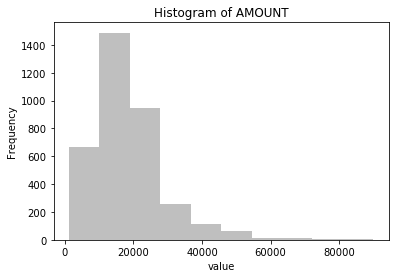

In [1190]:
plot_histogram(X["AMOUNT"])

In [1191]:
def plot_histogram_dv(x, y):
    plt.hist(list(x[y==0]), alpha=0.5, label='DV=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='DV=1')
    plt.title("Histogram of {var_name} by DV category".format(var_name = x.name))
    plt.xlabel("value")
    plt.ylabel("Frequency")
    plt.legend(loc = 'upper right')
    plt.show()              

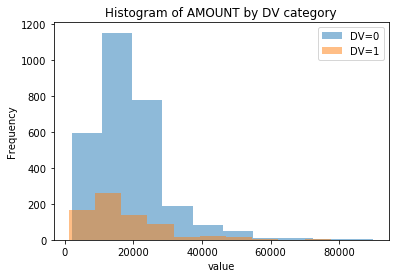

In [1192]:
plot_histogram_dv(X['AMOUNT'], Y)

In [1193]:
#Normalising features having signifant outliers
X['AMOUNT'] = np.log(X['AMOUNT'])
X['VALUE'] = np.log(X['VALUE'])
X['DUE_MORTGAGE'] = np.log(X['DUE_MORTGAGE'])

In [1194]:
#FEATURE ENGINEERING
from itertools import combinations
from sklearn.decomposition import PCA

pca = PCA(n_components=14)
X_pca = pd.DataFrame(pca.fit_transform(X))

In [1195]:
print(X_pca.head(5))

          0          1          2         3         4         5         6   \
0 -61.841799  -0.127916   1.151475  0.974375  0.821425 -1.214667 -0.454685   
1  -6.153211   4.435920  -2.784564  4.775054  0.843629 -1.426515 -0.506256   
2  62.263718  19.865859  -5.588598 -0.527546 -0.075346  0.720985 -0.714979   
3  24.452794  17.861349  -1.014898 -3.857120  0.683421  0.176676 -0.553217   
4 -96.775436  -4.320857  14.309506  0.091800  0.860686 -0.945751 -0.496093   

         7         8         9         10        11        12        13  
0 -0.227006 -0.452933 -0.256815  0.059073 -0.224798 -0.157618  0.101990  
1 -0.247676 -0.369624  0.474970 -0.123293 -0.101018 -0.162497  0.035550  
2 -0.180984  0.313713  0.075869 -0.031533 -0.214710  0.821867  0.058553  
3  0.742184 -0.095658  0.103081  0.364742 -0.321211 -0.138189  0.014474  
4 -0.132161 -0.007607  0.137906  0.060127  0.716478 -0.145530 -0.902902  


In [1196]:
#cross-validation
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, train_size=0.70, random_state=1)

In [1197]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


def find_model_perf(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    Y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(Y_test, Y_hat)
    
    return auc

In [1198]:
auc_processed = find_model_perf(LogisticRegression(), X_train, Y_train, X_test, Y_test)
print(auc_processed)

0.8089244851258581


In [1199]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [1200]:
def classification_model(model, data, outcome):
    #Fit the model:
    model.fit(data,outcome)
  
    #Make predictions on training set:
    predictions = model.predict(data)
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,outcome)
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=10)
    error = []
    auc_error = []
    for train, test in kf:
    # Filter training data
        train_predictors = (data.iloc[train,:])
    
    # The target we're using to train the algorithm.
        train_target = outcome.iloc[train]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
        error.append(model.score(data.iloc[test,:], outcome.iloc[test]))
        auc_error.append(find_model_perf(model, data.iloc[train,:], outcome.iloc[train], data.iloc[test,:], outcome.iloc[test]))
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    print ("AUC ROC : %s" % "{0:.3%}".format(np.mean(auc_error)))
    model.fit(data, outcome) 

In [1201]:
model = LogisticRegression()
classification_model(model, X_pca, Y)

Accuracy : 84.312%
Cross-Validation Score : 84.367%
AUC ROC : 79.143%


In [1202]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classification_model(model, X, Y)

Accuracy : 82.578%
Cross-Validation Score : 82.550%
AUC ROC : 78.724%


In [1203]:
classification_model(DecisionTreeClassifier(), X, Y)

Accuracy : 100.000%
Cross-Validation Score : 85.656%
AUC ROC : 76.762%


In [1204]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=0)

classification_model(model, X, Y)

Accuracy : 91.471%
Cross-Validation Score : 89.150%
AUC ROC : 91.120%


In [1205]:
#Feature Engineering: Feature importance ranking
predictor_var=['AMOUNT','DUE_MORTGAGE','VALUE','REASON','OCC','TJOB','DCL','CLT','CL_COUNT','RATIO','CONVICTED','VAR_1','VAR_2','VAR_3']
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

VALUE           0.18
RATIO           0.16
TJOB            0.12
DUE_MORTGAGE    0.12
CL_COUNT        0.10
VAR_3           0.09
CLT             0.05
VAR_2           0.04
VAR_1           0.04
DCL             0.04
AMOUNT          0.04
OCC             0.02
CONVICTED       0.00
REASON          0.00
dtype: float64


In [1206]:
model = RandomForestClassifier(n_estimators=100)
classification_model(model, X_pca, Y)

Accuracy : 100.000%
Cross-Validation Score : 89.429%
AUC ROC : 93.120%


In [1207]:
#Feature Engineering: Feature importance ranking
predictor_var=['AMOUNT','DUE_MORTGAGE','VALUE','REASON','OCC','TJOB','DCL','CLT','CL_COUNT','RATIO','CONVICTED','VAR_1','VAR_2','VAR_3']
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

DCL             0.147196
CLT             0.099869
AMOUNT          0.099259
REASON          0.093031
DUE_MORTGAGE    0.069821
CL_COUNT        0.068332
TJOB            0.061398
OCC             0.058592
CONVICTED       0.055652
VALUE           0.053012
VAR_3           0.052560
VAR_2           0.051690
VAR_1           0.051606
RATIO           0.037982
dtype: float64


In [1208]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
reduced_features = ['DCL','AMOUNT','CLT','REASON','CL_COUNT','DUE_MORTGAGE']
X_new=X[reduced_features]
classification_model(model, X, Y)
predictor_var=['AMOUNT','DUE_MORTGAGE','VALUE','REASON','OCC','TJOB','DCL','CLT','CL_COUNT','RATIO','CONVICTED','VAR_1','VAR_2','VAR_3']
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Accuracy : 84.368%
Cross-Validation Score : 82.242%
AUC ROC : 89.081%
RATIO           0.202682
DCL             0.138647
VAR_1           0.114200
CLT             0.109454
AMOUNT          0.081071
VAR_2           0.079046
CL_COUNT        0.073476
VALUE           0.070020
DUE_MORTGAGE    0.036408
TJOB            0.029333
VAR_3           0.028830
OCC             0.027554
REASON          0.006161
CONVICTED       0.003118
dtype: float64


Classification Model using Ensembles

In [1209]:
#Using BaggingClassifier adn DecisionTreeClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
kfold = model_selection.KFold(n_splits=8, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
classification_model(model, X, Y)


Accuracy : 100.000%
Cross-Validation Score : 89.710%
AUC ROC : 92.550%


In [1211]:

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=8, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees ,random_state=0)
classification_model(model, X, Y)
predictor_var=['AMOUNT','DUE_MORTGAGE','VALUE','REASON','OCC','TJOB','DCL','CLT','CL_COUNT','RATIO','CONVICTED','VAR_1','VAR_2','VAR_3']
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Accuracy : 100.000%
Cross-Validation Score : 90.911%
AUC ROC : 95.194%
RATIO           0.228035
CLT             0.102920
VALUE           0.092213
AMOUNT          0.084906
DUE_MORTGAGE    0.079150
DCL             0.076872
CL_COUNT        0.075754
TJOB            0.060343
VAR_3           0.054939
VAR_1           0.053301
VAR_2           0.042504
OCC             0.030646
REASON          0.012075
CONVICTED       0.006342
dtype: float64


In [1212]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=8, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
classification_model(model, X, Y)
predictor_var=['AMOUNT','DUE_MORTGAGE','VALUE','REASON','OCC','TJOB','DCL','CLT','CL_COUNT','RATIO','CONVICTED','VAR_1','VAR_2','VAR_3']
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Accuracy : 89.569%
Cross-Validation Score : 88.507%
AUC ROC : 90.066%
RATIO           0.233333
CL_COUNT        0.166667
VALUE           0.133333
CLT             0.100000
DCL             0.100000
VAR_1           0.066667
AMOUNT          0.066667
VAR_3           0.033333
VAR_2           0.033333
TJOB            0.033333
DUE_MORTGAGE    0.033333
CONVICTED       0.000000
OCC             0.000000
REASON          0.000000
dtype: float64


In [1213]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=8, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
classification_model(model, X, Y)
predictor_var=['AMOUNT','DUE_MORTGAGE','VALUE','REASON','OCC','TJOB','DCL','CLT','CL_COUNT','RATIO','CONVICTED','VAR_1','VAR_2','VAR_3']
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Accuracy : 92.506%
Cross-Validation Score : 89.933%
AUC ROC : 92.419%
RATIO           0.242420
CLT             0.114151
VALUE           0.102271
CL_COUNT        0.091211
DUE_MORTGAGE    0.077136
DCL             0.075273
AMOUNT          0.065863
TJOB            0.064980
VAR_1           0.049717
VAR_3           0.047066
VAR_2           0.045956
OCC             0.021777
REASON          0.002177
CONVICTED       0.000000
dtype: float64


In [1214]:
test = pd.read_csv('C:/test.csv', na_values = ['#NAME?']) 
test.head()

,TEST_ID,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3
0,25667,3686224,12300,67373.0,88453.0,1.0,0.0,2.0,0.0,235.775997,26.0,29.107299,0,0,3,2.1966
1,25668,3686225,45100,NaN,76653.0,0.0,1.0,11.0,0.0,298.300000,13.0,NaN,0,0,0,2.4432
2,25669,3686226,28400,129927.0,178898.0,1.0,3.0,2.0,NaN,114.942639,39.0,33.450162,0,0,0,1.0867
3,25670,3686227,8400,101049.0,115195.0,0.0,1.0,23.0,0.0,131.256329,12.0,36.515999,0,0,0,1.5343
4,25671,3686228,20000,16131.0,70572.0,1.0,1.0,NaN,0.0,243.365403,22.0,39.456251,0,0,0,2.3169


In [1215]:
#Imputing the test data with median values 
test_id = test['LOAN_ID']
test = test.drop('TEST_ID', 1)
test.head()

,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3
0,3686224,12300,67373.0,88453.0,1.0,0.0,2.0,0.0,235.775997,26.0,29.107299,0,0,3,2.1966
1,3686225,45100,NaN,76653.0,0.0,1.0,11.0,0.0,298.300000,13.0,NaN,0,0,0,2.4432
2,3686226,28400,129927.0,178898.0,1.0,3.0,2.0,NaN,114.942639,39.0,33.450162,0,0,0,1.0867
3,3686227,8400,101049.0,115195.0,0.0,1.0,23.0,0.0,131.256329,12.0,36.515999,0,0,0,1.5343
4,3686228,20000,16131.0,70572.0,1.0,1.0,NaN,0.0,243.365403,22.0,39.456251,0,0,0,2.3169


In [1216]:
test = test.drop('LOAN_ID', 1)
test.head()

,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3
0,12300,67373.0,88453.0,1.0,0.0,2.0,0.0,235.775997,26.0,29.107299,0,0,3,2.1966
1,45100,NaN,76653.0,0.0,1.0,11.0,0.0,298.300000,13.0,NaN,0,0,0,2.4432
2,28400,129927.0,178898.0,1.0,3.0,2.0,NaN,114.942639,39.0,33.450162,0,0,0,1.0867
3,8400,101049.0,115195.0,0.0,1.0,23.0,0.0,131.256329,12.0,36.515999,0,0,0,1.5343
4,20000,16131.0,70572.0,1.0,1.0,NaN,0.0,243.365403,22.0,39.456251,0,0,0,2.3169


In [1217]:
imp = Imputer(missing_values = 'NaN' , strategy = 'median' , axis = 0)
imp.fit(test)
test = pd.DataFrame(data = imp.transform(test) , columns=test.columns)

In [1218]:
test.head()


,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3
0,12300.0,67373.0,88453.0,1.0,0.0,2.0,0.0,235.775997,26.0,29.107299,0.0,0.0,3.0,2.1966
1,45100.0,63955.5,76653.0,0.0,1.0,11.0,0.0,298.300000,13.0,35.068381,0.0,0.0,0.0,2.4432
2,28400.0,129927.0,178898.0,1.0,3.0,2.0,0.0,114.942639,39.0,33.450162,0.0,0.0,0.0,1.0867
3,8400.0,101049.0,115195.0,0.0,1.0,23.0,0.0,131.256329,12.0,36.515999,0.0,0.0,0.0,1.5343
4,20000.0,16131.0,70572.0,1.0,1.0,7.0,0.0,243.365403,22.0,39.456251,0.0,0.0,0.0,2.3169


In [1219]:
#Uing GradientBooostingClassifier to train the entire training set
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
reduced_features = ['RATIO','CLT','VALUE','CL_COUNT','DUE_MORTGAGE']
X_new=X[reduced_features]
test_new=test[reduced_features]
seed = 9
num_trees = 14
kfold = model_selection.KFold(n_splits=200, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
classification_model(model, X_new, Y)
model.fit(X_new, Y)
prd = model.predict(test_new)



Accuracy : 87.388%
Cross-Validation Score : 86.914%
AUC ROC : 85.920%


In [1220]:
model.fit(X_new, Y)
prd = model.predict(test_new)

In [1221]:
output = pd.DataFrame(prd.view())

In [1222]:
test_id = pd.DataFrame(test_id)

In [1223]:
type(test_id)

pandas.core.frame.DataFrame

In [1224]:
test_id.shape

(2384, 1)

In [1225]:
type(prd)

numpy.ndarray

In [1226]:
output   


,0
0,0
1,0
2,1
3,0
4,0
5,1
6,1
7,0
8,0
9,0


In [1227]:
test_id['DEFAULTER']=prd
sum(test_id['DEFAULTER'])

502

In [1228]:
test_id

,LOAN_ID,DEFAULTER
0,3686224,0
1,3686225,0
2,3686226,1
3,3686227,0
4,3686228,0
5,3686229,1
6,3686230,1
7,3686231,0
8,3686232,0
9,3686233,0


In [1229]:
type(test_id)

pandas.core.frame.DataFrame

In [1232]:
test_id.to_csv('D:/Submission.csv')